# KNN Model – Sampling Comparison

In [6]:

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from models.train_knn import run
from models.utils import load_dataframe, split_features


In [7]:

MODEL = 'knn'
SAMPLINGS = ['none', 'under', 'smote']


In [8]:

results = {}
for samp in SAMPLINGS:
    print('Running sampling:', samp)
    results[samp] = run(samp)


Running sampling: none


Best params: {'clf__n_neighbors': 3, 'clf__weights': 'distance'}
[KNN[none]] precision=1.0000 recall=0.0952 auc=0.5389
Confusion Matrix:
 [[2219    0]
 [  19    2]]
Running sampling: under
Best params: {'clf__n_neighbors': 11, 'clf__weights': 'distance'}
[KNN[under]] precision=0.0117 recall=0.7143 auc=0.5599
Confusion Matrix:
 [[ 947 1272]
 [   6   15]]
Running sampling: smote
Best params: {'clf__n_neighbors': 11, 'clf__weights': 'uniform'}
[KNN[smote]] precision=0.0092 recall=0.1429 auc=0.5103
Confusion Matrix:
 [[1896  323]
 [  18    3]]


In [9]:

metrics_df = pd.DataFrame(
    [{'sampling': samp, **metrics} for samp, metrics in results.items()]
)
metrics_df[['sampling', 'precision', 'recall', 'roc_auc']]


,sampling,precision,recall,roc_auc
0,none,1.000000,0.095238,0.538853
1,under,0.011655,0.714286,0.559905
2,smote,0.009202,0.142857,0.510333


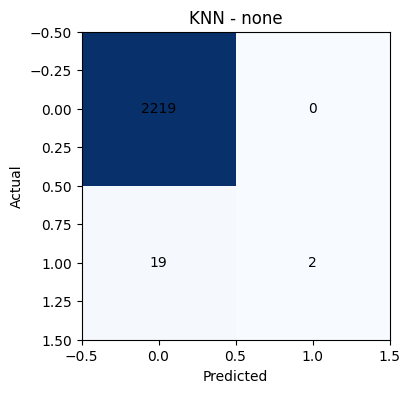

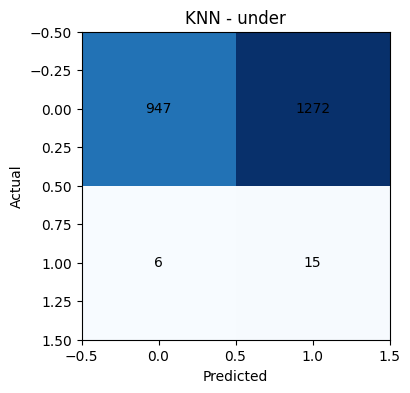

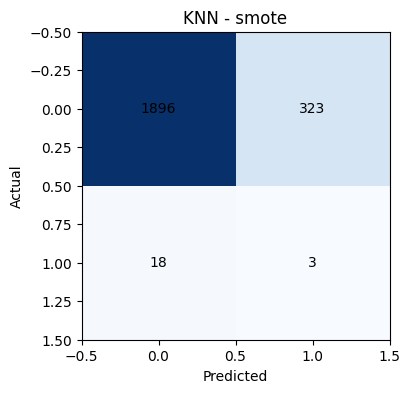

In [10]:

for samp, metrics in results.items():
    cm = metrics['confusion_matrix']
    plt.figure(figsize=(4, 4))
    plt.imshow(cm, cmap='Blues')
    plt.title(f"{MODEL.upper()} - {samp}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, cm[i][j], ha='center', va='center', color='black')
    plt.show()
